In [399]:
import numpy as np
import pandas as pd
import seaborn as sns
import cufflinks as cf
cf.go_offline()
import matplotlib.pyplot as plt
%matplotlib inline
import cufflinks as cf
cf.go_offline

<function cufflinks.offline.go_offline(connected=None)>

In [400]:
app=pd.read_csv('train.csv')

In [401]:
app.head()

,app_id,category,reviews,size,installs,price,suitable_for,last_update,latest_ver,popularity
0,330090,PERSONALIZATION,4,511k,50+,0,Everyone,"December 31, 2016",1.4,High
1,226147,GAME,568391,5.2M,"5,000,000+",0,Teen,"July 1, 2014",4.3.1,High
2,107000,FAMILY,144,70M,"1,000+",$2.99,Teen,"January 26, 2018",1.0.0,High
3,217582,FAMILY,1499466,96M,"10,000,000+",0,Teen,"July 24, 2018",1.25.0,High
4,370113,DATING,84,4.5M,"1,000+",0,Mature 17+,"July 6, 2018",8.2,High


In [402]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1975 entries, 0 to 1974
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   app_id        1975 non-null   int64 
 1   category      1975 non-null   object
 2   reviews       1975 non-null   int64 
 3   size          1975 non-null   object
 4   installs      1975 non-null   object
 5   price         1975 non-null   object
 6   suitable_for  1975 non-null   object
 7   last_update   1975 non-null   object
 8   latest_ver    1971 non-null   object
 9   popularity    1975 non-null   object
dtypes: int64(2), object(8)
memory usage: 154.4+ KB


In [403]:
app.describe()

,app_id,reviews
count,1975.000000,1.975000e+03
mean,490685.787342,1.988162e+05
std,288098.937034,1.494091e+06
min,1160.000000,1.000000e+00
25%,239249.500000,3.300000e+01
50%,481867.000000,5.160000e+02
75%,737373.500000,1.912200e+04
max,999218.000000,4.489172e+07


In [404]:
#sns.displot(app['popularity'])

app['popularity'].iplot(kind='hist',color='green',title="Popularity of the App",xTitle='popularity', yTitle='Count')


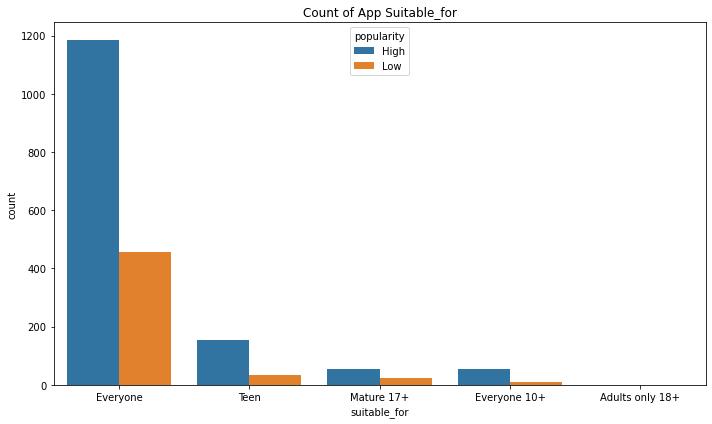

In [405]:
plt.figure(figsize=(10,6))
sns.countplot(x='suitable_for',hue='popularity',data=app)
plt.title('Count of App Suitable_for')
plt.tight_layout()

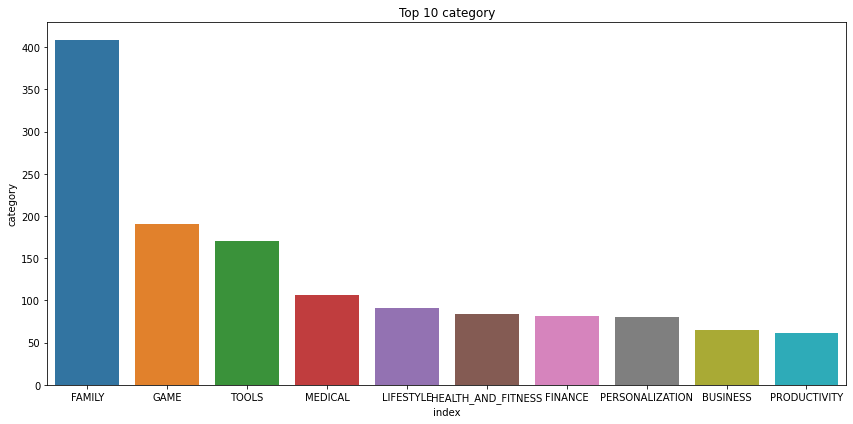

In [406]:
plt.figure(figsize=(12,6))
category=pd.DataFrame(app['category'].value_counts().reset_index().head(10))
sns.barplot(x='index',y='category',data=category)
plt.title('Top 10 category')
plt.tight_layout()

## Data Process

In [407]:
app.isnull().sum()

app_id          0
category        0
reviews         0
size            0
installs        0
price           0
suitable_for    0
last_update     0
latest_ver      4
popularity      0
dtype: int64

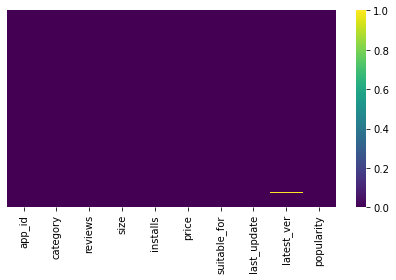

In [408]:
sns.heatmap(app.isnull(),yticklabels=False, cbar=True, cmap='viridis')
plt.tight_layout()

In [409]:
app['latest_ver']=app['latest_ver'].fillna(app['latest_ver'].mode()[0])

In [410]:
#convert all categorical columns to numeric
app['popularity'].unique()

array(['High', 'Low'], dtype=object)

In [411]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
app['category']=encoder.fit_transform(app['category'])
app['suitable_for']=encoder.fit_transform(app['suitable_for'])


size_mapping = {'High': 1,'Low': 0}
app['popularity'] = app['popularity'].map(size_mapping)

In [412]:
app['price'] = app['price'].str.replace(',','').str.replace('$','').astype('float')
app['installs'] = app['installs'].str.replace(',','').str.replace('+','').astype('int')
app['size'] = app['size'].replace({'k': '*1e3', 'M':'*1e6'}, regex=True).map(pd.eval).astype(int)

C:\Users\Daisy\AppData\Local\Temp/ipykernel_12136/1182368818.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

C:\Users\Daisy\AppData\Local\Temp/ipykernel_12136/1182368818.py:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [413]:
app['last_update']=pd.to_datetime(app['last_update'])
app['Year'] = app['last_update'].apply(lambda time: time.year)

In [414]:
app.head()

,app_id,category,reviews,size,installs,price,suitable_for,last_update,latest_ver,popularity,Year
0,330090,23,4,511000,50,0.00,1,2016-12-31,1.4,1,2016
1,226147,14,568391,5200000,5000000,0.00,4,2014-07-01,4.3.1,1,2014
2,107000,11,144,70000000,1000,2.99,4,2018-01-26,1.0.0,1,2018
3,217582,11,1499466,96000000,10000000,0.00,4,2018-07-24,1.25.0,1,2018
4,370113,7,84,4500000,1000,0.00,3,2018-07-06,8.2,1,2018


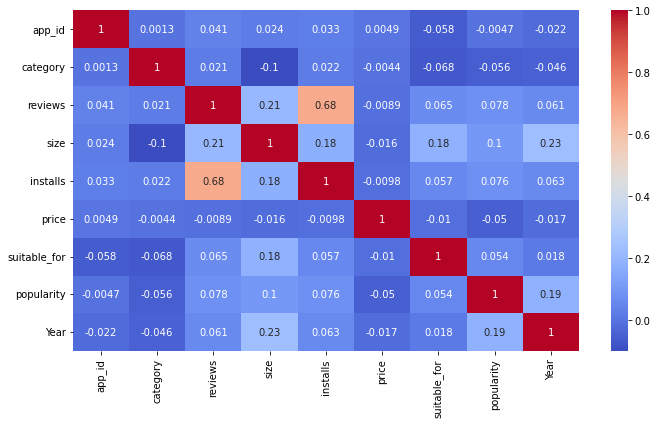

In [415]:
plt.figure(figsize=(10,6))
sns.heatmap(app.corr(),cmap='coolwarm',annot=True)
plt.tight_layout()

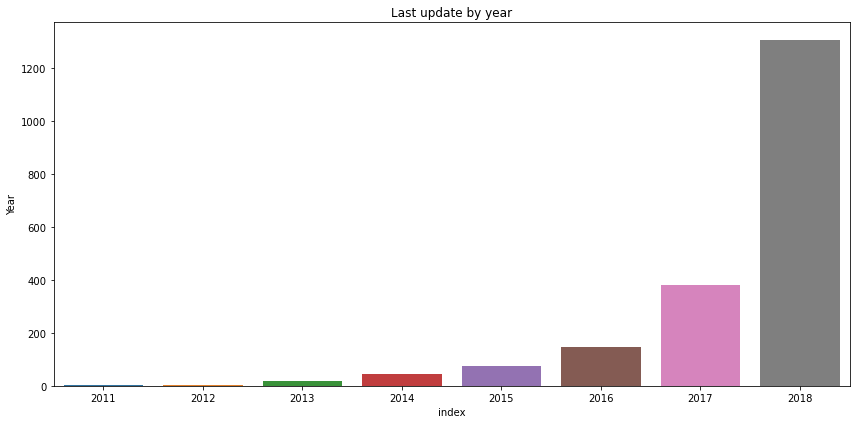

In [416]:
category = app['Year'].value_counts().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x='index',y='Year',data=category)
plt.title('Last update by year')
plt.tight_layout()


### Process Imbalance Data

In [417]:
app['popularity'].value_counts()

1    1450
0     525
Name: popularity, dtype: int64

In [418]:
df_majority = app[app['popularity']==1]
df_minority = app[app['popularity']==0]

from sklearn.utils import resample
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    
                                 n_samples=1450,    
                                 random_state=123)

df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_upsampled['popularity'].value_counts()

1    1450
0    1450
Name: popularity, dtype: int64

#### Splitting into a Training/Test set

In [419]:
from sklearn.model_selection import train_test_split

X =df_upsampled.drop(['last_update','latest_ver','popularity'],axis=1)
y =df_upsampled['popularity']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

#from sklearn.preprocessing import StandardScaler
#scl= StandardScaler()
#X_train_std = scl.fit_transform(X_train)
#X_test_std = scl.transform(X_test)

In [420]:
## Fit the data

In [421]:
from sklearn.linear_model import LogisticRegression
logmodel= LogisticRegression()
logmodel.fit(X_train,y_train)
prediction_log= logmodel.predict(X_test)

In [422]:
from sklearn.metrics import accuracy_score
accuracy_log = accuracy_score(y_test,prediction_log)
accuracy_log

0.6620689655172414

In [423]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,prediction_log))
print(confusion_matrix(y_test,prediction_log))

              precision    recall  f1-score   support

           0       0.60      0.95      0.74       435
           1       0.88      0.37      0.53       435

    accuracy                           0.66       870
   macro avg       0.74      0.66      0.63       870
weighted avg       0.74      0.66      0.63       870

[[413  22]
 [272 163]]


In [424]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 400)
forest.fit(X_train, y_train)
prediction_rf= forest.predict(X_test)


In [425]:
accuracy_rf = accuracy_score(y_test,prediction_rf)
accuracy_rf

0.8839080459770114

In [426]:

print(classification_report(y_test,prediction_rf))
print(confusion_matrix(y_test,prediction_rf))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       435
           1       0.93      0.83      0.88       435

    accuracy                           0.88       870
   macro avg       0.89      0.88      0.88       870
weighted avg       0.89      0.88      0.88       870

[[409  26]
 [ 75 360]]


In [427]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,prediction_rf))
print(confusion_matrix(y_test,prediction_rf))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       435
           1       0.93      0.83      0.88       435

    accuracy                           0.88       870
   macro avg       0.89      0.88      0.88       870
weighted avg       0.89      0.88      0.88       870

[[409  26]
 [ 75 360]]


In [428]:
from sklearn.naive_bayes import GaussianNB
nbmodel = GaussianNB()
nbmodel.fit(X_train, y_train)
prediction_nb= nbmodel.predict(X_test)


In [429]:
accuracy_nb = accuracy_score(y_test,prediction_nb)
accuracy_nb


0.5908045977011495

## Similar Approach to the provided test data

In [430]:
testdf=pd.read_csv('test.csv')

In [431]:
testdf.head()

,app_id,category,reviews,size,installs,price,suitable_for,last_update,latest_ver
0,144236,TOOLS,262076,1.2M,"10,000,000+",0,Everyone,"January 4, 2018",1.0.2
1,881323,PHOTOGRAPHY,12204,6.8M,"1,000,000+",0,Everyone,"March 14, 2017",1.5.2.21
2,765524,TOOLS,632,8.2M,"500,000+",0,Everyone,"May 23, 2017",1.0
3,390533,BUSINESS,29,16M,500+,0,Everyone,"July 5, 2018",2.2.1335
4,817383,ART_AND_DESIGN,192,6.0M,"10,000+",0,Everyone,"April 25, 2018",1.5


In [432]:
#

In [433]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
testdf['category']=encoder.fit_transform(testdf['category'])
testdf['suitable_for']=encoder.fit_transform(testdf['suitable_for'])
#app['popularity']=encoder.fit_transform(app['popularity'])


testdf['price'] = testdf['price'].str.replace(',','').str.replace('$','').astype('float')
testdf['installs'] = testdf['installs'].str.replace(',','').str.replace('+','').astype('int')
testdf['size'] = testdf['size'].replace({'k': '*1e3', 'M':'*1e6'}, regex=True).map(pd.eval).astype(int)

testdf['last_update']=pd.to_datetime(testdf['last_update'])
testdf['Year'] = testdf['last_update'].apply(lambda time: time.year)

C:\Users\Daisy\AppData\Local\Temp/ipykernel_12136/984064798.py:8: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

C:\Users\Daisy\AppData\Local\Temp/ipykernel_12136/984064798.py:9: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [434]:
testdf.head()

,app_id,category,reviews,size,installs,price,suitable_for,last_update,latest_ver,Year
0,144236,29,262076,1200000,10000000,0.0,1,2018-01-04,1.0.2,2018
1,881323,24,12204,6800000,1000000,0.0,1,2017-03-14,1.5.2.21,2017
2,765524,29,632,8199999,500000,0.0,1,2017-05-23,1.0,2017
3,390533,4,29,16000000,500,0.0,1,2018-07-05,2.2.1335,2018
4,817383,0,192,6000000,10000,0.0,1,2018-04-25,1.5,2018


In [435]:
test=testdf.drop(['last_update','latest_ver'],axis=1)
prediction_test= forest.predict(test)

In [436]:
my_submission = pd.DataFrame({'app_id': testdf.app_id, 'popularity': prediction_test})
my_submission['popularity'] = my_submission['popularity'].map({1: 'High', 0: 'Low'})


In [437]:
my_submission.to_csv('submission.csv', index=False)